# HCI 574 General HW Instructions


### Work through the problems
- Answer the questions shown in the HW. Fix anything with ???. Answers to text questions should be given in a printed string, e.g.:  `print("This is the answer")` or as a comment e.g. `# This is the answer`
- Ensure that VSCode is set to autosve your notebook! In _Settings_ search for autosave and set it to 1000 ms.
- It's fine to create new python cells if you want to try something without changing the offcial cell but please ensure that at the end there's only one cell with your official answer to the question and (__very impotant!__) that that cell as been run/executed so we can see its output. If you want to "save" your inofficial cell(s), make sure they are fully commented out!



### Handing in the HW
- Check that all other files the HW might have (screenshots, data files, etc.) are indeed in the correct HW folder.
- Zip your HW folder folder (e.g. into HW1_ALemming.zip). On Windows you can Right-click -> Send To - Compress Folder. Please don't use rar or any other exotic compressors!
- Zip your HW folder and hand it into Gradescope


### Points

The number of points a problem is worth when solved properly is always shown inside brackets at the heading of the problem, e.g.
##### Q1 [ 3.5 pts]  This problem is worth 3.5 points

Sometimes you may get additional extra credits if we feel your solution is particularly clever, etc. 
Some problem are entirely __optional__, these will have a + in from of the points, e.g.
##### Q2 [ +1 pt ] This *optional* problem is worth 1 point

You can solve these optional points to learn more or make up of points you missed in earlier HW. Note however, that there's a cap on the total HW points, if you have more than 100% of HW points the end of the semester, it will be reduced to 100%

### Questions?
If you have questions or need help, ask me after class, use Piazza or ask the TA during office hours  

# HCI 574 HW7 - plotting a GPS track
- most of the material needed for HW7 is in lectures 23 (timedate) and 26 (Pandas dataframe and plotting)
- HTML Documentation for: [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), [Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html), [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) and [plotting](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) 


- The spreadsheet file `gps_data.csv` contains a table of GPS locations over time and velocities from a car trip.
- Your task is to analyze and plot (graph) the data.

```
secs 	x 	    y 	    velocity
0.67 	75.56 	400.59 	0.5556
1.18 	75.56 	400.59 	0.9260  
2.37 	78.05 	400.40 	1.8892
3.15 	78.97 	401.14 	2.4000
...
```

- The first column (secs) contains the time in seconds at which each measurement was taken (0 = start of trip)
- The locations (coordinates) of each GPS measured point is given in x and y columns
- The last column contains the velocity of the car at each location (in km/h)

In [ ]:
# I assume that you have installed pandas, numpy and matplotlib as part of lecture 24
# if not please put the missing package here and install it via %pip e.g. %pip install pandas
%pip install pandas numpy matplotlib

In [2]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime
print("Imports done")

# plotting output will be in simple static images
%matplotlib inline 

C:\Users\david\AppData\Local\Temp\ipykernel_28896\2878128477.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Imports done


###  Q1: Import a csv file into a dataframe, show column headers and pull out the velocity column [ 2 pts ]
- Use pandas to create a dataframe from the csv spreadsheet file.
- print out a list of it's column names
- make a variable vel that contains the velocity column 
- print out how many rows vel contains

In [11]:
csv_file = "gps_data.csv"

# read csv file into a dataframe
df = pd.read_csv(csv_file)

# print out a list of column names
print("names of columns are:", list(df.columns))

# make a variable velocity that contains the velocity column (will be a Pandas Series!)
velocity =  df['velocity']
print(type(velocity))

# print out how many rows vel contains (use Pandas to calculate that!)
print("velocity column contains", df.shape[0], "rows")



names of columns are: ['secs', 'x', 'y', 'velocity']
<class 'pandas.core.series.Series'>
velocity column contains 223 rows


###  Q2: Get the mean velocity and standard deviation [ 1 pt ]
- you could use numpy with the velocity Series as we did in lecture 26
- or: have the Series calculate its own mean and std.dev.: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

In [21]:
print("mean velocity is", np.mean(velocity))
print("standard deviation of velocity is is", np.std(velocity))



mean velocity is 25.859978475336323
standard deviation of velocity is is 14.93481492992485


###  Q3: Optional: Calculate a point size based on the velocity [ +2 pts ]
- Optional:  make a new column psize (for point size) that reflects the velocity at that time
- When you get to plotting this data, you will have to experiment with what sizes plot well, but I would go from size 1 to about size 10
- You need to have at least 3 different sizes for low, medium and high velocity but it's up to you what velocity values you use as thresholds (you could look at the histogram of the velcity distribution you could create at the end and find two good thresholds)

<p>

- You could also use a smooth increase of size (starting at 1) up to a max (10?). 
- It's up to you if that increase is linear or not. (Flannery’s perceptual scaling would suggest that doubling the radius is not perceived as twice the area: https://makingmaps.net/2007/08/28/perceptual-scaling-of-map-symbols/)  
- Please leave comments as to what kind of math you're doing!
- print out the summary stats for your psize column at the end

In [ ]:
# Optional: make a new column psize (for point size) that reflects the velocity at that time



###  Q4: Calculate the datetime for start and end of the trip [6 pts]
- if you need a refresher on how datetime and timedelta works, consult lecture 23

In [22]:
# The trip started at 9 hours 45 minutes (9:45 am) and 34 seconds on March 17, 2017.  

# Create a datetime object from this point in date/time (1 point)
start_time = datetime.datetime(2017, 3, 17, 9, 45, 34)
print("start date/time of trip", start_time)



start date/time of trip 2017-03-17 09:45:34


In [45]:
# pull out the column called secs  (1 point)
secs = df["secs"]
print(secs.head())

# figure out how long (how many seconds) the total trip took (1 point)
# (hint: this would be the secs value for the last row, which will also be the largest number in that column)
trip_length_in_seconds = secs.iloc[-1]
print("trip took", trip_length_in_seconds, "seconds")



0    0.00
1    1.18
2    2.37
3    3.15
4    4.39
Name: secs, dtype: float64
trip took 277.73 seconds


In [49]:
# convert the trip length to a timedelta, i.e. a duration.  (1 point)
tdiff = datetime.timedelta(seconds=trip_length_in_seconds)
print("trip duration as timedelta object is", tdiff.total_seconds(), "seconds")



trip duration as timedelta object is 277.73 seconds


In [50]:
# get datetime of the end of the trip (2 points)
end_time = start_time + tdiff

# print out date/time of start and end of the trip
print("start date/time of trip", start_time)
print("end   date/time of trip", end_time)




start date/time of trip 2017-03-17 09:45:34
end   date/time of trip 2017-03-17 09:50:11.730000


### Q5: plot the gps data  [ 8 pts ]
- to start, look at the scatter plot we did in lecture 26
- use the Pandas dataframe's `plot()` method to graph the trip as points (kind='scatter') (1 pt)
- example (with optional point sizes):![trip plot](trip_plot_example.png "Example")

<p>

- use the x and y columns of your dataframe as coordinates
- set the color to "blue" (1 pt)
- set the marker size to a good size (maybe 2?) (1 pt)
- (if you created the optional psize column, use it to set the marker size 

<p>

- make the plot 10 x 10 inches (1 pt)
- set plot limits for x and y to range from -50 to 500 (1 pt)
- show a grid (1 pt)
- as title, show the trip start and end datetimes (__use str() to convert the datetimes to a string first!__) (2 pts)
- make sure to assign the return from plot() to a variable, as we will need that next

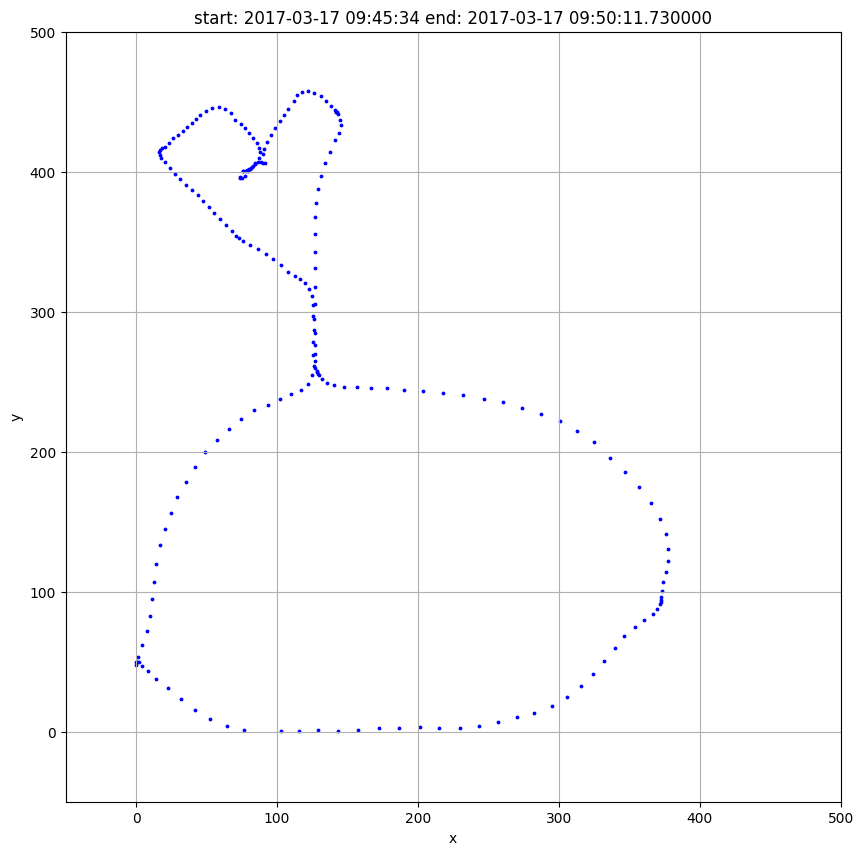

In [54]:
p = df.plot(kind='scatter',
            x='x',
            y='y',
            color='blue',
            s=3,
            figsize=(10, 10),
            xlim=(-50, 500),
            ylim=(-50, 500),
            grid=True,
            title="start: " + str(start_time) + " end: " + str(end_time),
            );




### Q6: Optional:  Plot points above ("scatter") but overplot a line plot  [+ 1] 
- example:![trip plot](trip_overplot_example.png "Example")
- you can use any good color
- You will need to copy/paste the code of your scatter plot from above into the next cell. Not sure why but otherwise the overplot won't show up.
- instead of s for (point) size, use `lw` (linewidth), e.g. `lw=1`
- Important: for the line graph to plot over the previous plot p, you will have to create a new plot (p2) and in it the  `ax` argument must be set to p, i.e. `ax=p`


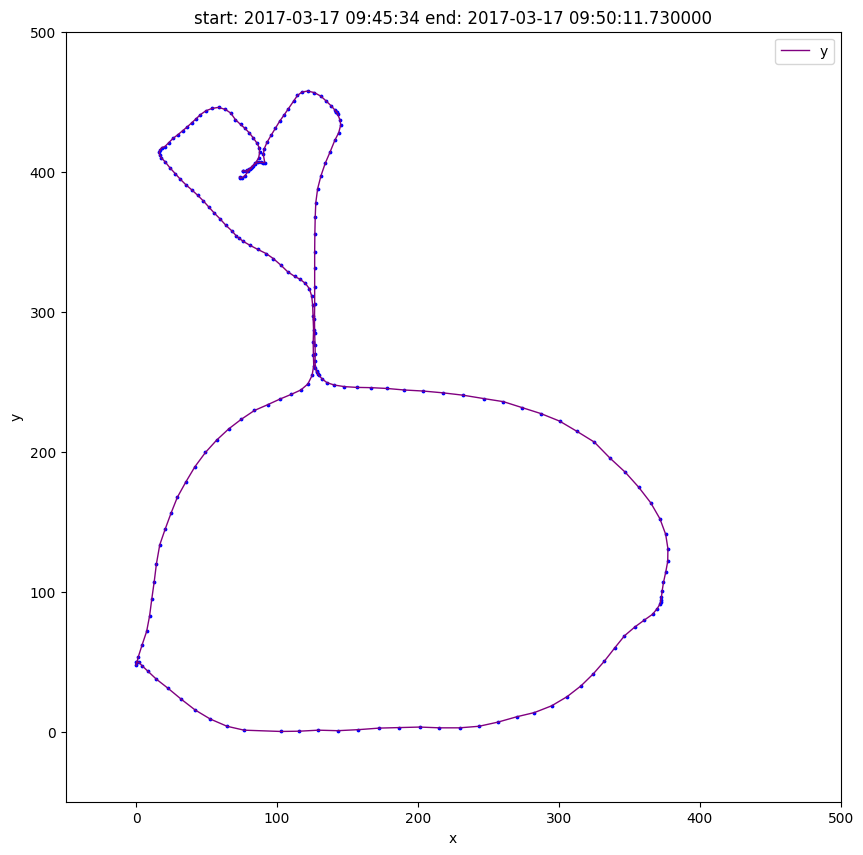

In [55]:
# Optional: overplot scatter plot with a line plot

# Copy/paste your scatterplot from above here
p = df.plot(kind='scatter',
            x='x',
            y='y',
            color='blue',
            s=3,
            figsize=(10, 10),
            xlim=(-50, 500),
            ylim=(-50, 500),
            grid=True,
            title="start: " + str(start_time) + " end: " + str(end_time),
            );

# in your line plot, remember to set ax=p so it plots on top of the scatter plot!
p2 = df.plot(kind='line',
             x='x',
             y='y',
             lw=1,
             ax=p,
             color='purple')



### Q7: Save plot a pdf (programatically!) [2 pts] 
- Saving via the interactive plot viewer doesn't count!
- make sure you've set the paper size (10 by 10) via `figsize` in `plot()`
- get the figure from the axes (p) (or p2 if you did the scatter + line plot)
- using the figure save the plot as `gpsplot.pdf`

In [53]:
fig = p2.get_figure()
fig.savefig("gpsplot.pdf")

### Q8: Optional: Plot histogram of the velocity  [ +1 pts ]
- use a binsize of 2 (but ... you need to create a list of bin boundaries between the lowest and highest velocity values first.)
- save the plot as histo.pdf


0.1852


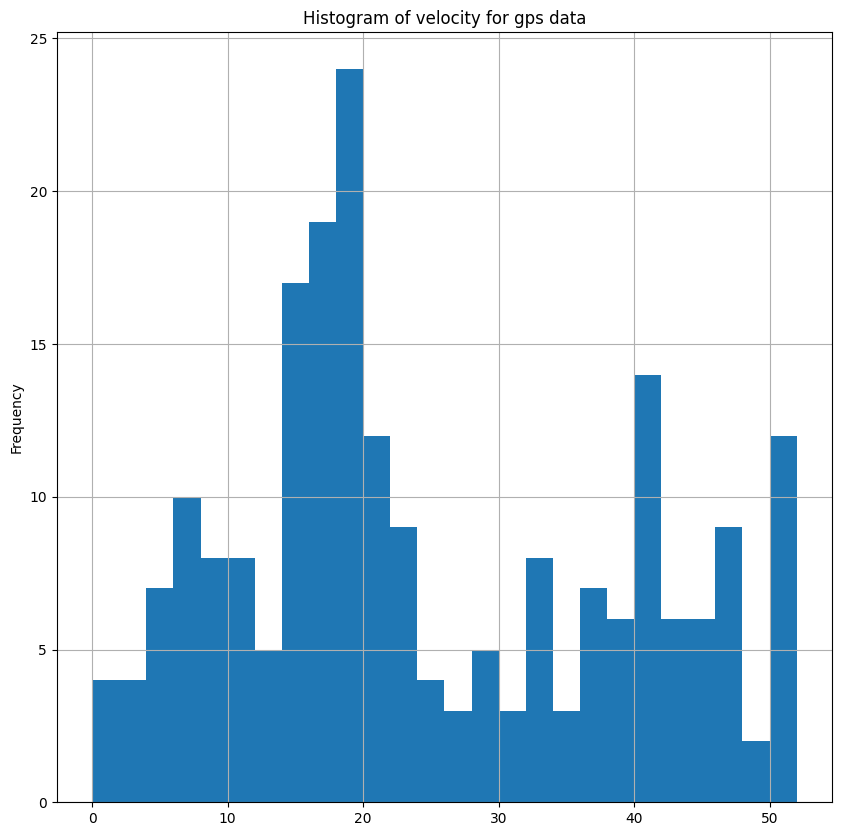

In [60]:
# Optional: Plot histogram of the velocity
bin_list = range(round(df['velocity'].min()), round(df['velocity'].max()), 2)

p3 = df['velocity'].plot(kind='hist',
                         grid=True,
                         ax=None,
                         figsize=(10,10),
                         title="Histogram of velocity for gps data",
                         bins=bin_list)

